# Image remap for an office room theater

Date: 2024/01/08 - 2024/01/09

Reference: https://stackoverflow.com/questions/46520123/how-do-i-use-opencvs-remap-function

```
LEFT WALL

----0----P------------------------W----> X axis
           Camera1 image
    +----+------------------------+
     \   |                   .    |
      \  D              .         |
       \ |         .              |
        \|    .                   |
         X                        | Camera2 image
        /|    .                   |
       / |         .              |
      /  D              .         |
     /   |                   .    |
    +----+------------------------+
           Camera3 image
<---W----P------------------------O---- X axis

RIGHT WALL
```

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

PL = 2  # 2m
D = 2.5  # 2.5m
W = 8

# <<< LEFT WALL >>>
# fx returns D/ sqrt(D**2 + P**2) at x = 0
# fx returns 1 at x = P
# fx returns D / sqrt(D**2 + (W-P)**2) at x = W

fx = lambda x: D / math.sqrt(D**2 + (x-PL)**2)

In [2]:
print(f'x  left')
for x in range(0, 10, 1):
    print(f'{x}, {fx(x):.2F}')

x  left
0, 0.78
1, 0.93
2, 1.00
3, 0.93
4, 0.78
5, 0.64
6, 0.53
7, 0.45
8, 0.38
9, 0.34


In [3]:
new_x_left = []
x_accum = 0
for i in range(0, 32):
    x = W * i/32
    x_accum += fx(x)
    new_x_left.append(x_accum)

new_x_left = np.array(new_x_left)

new_x_right = []
x_accum = 0
for i in range(32, 0, -1):
    x = W * i/32
    x_accum += fx(x)
    new_x_right.append(x_accum)

<StemContainer object of 3 artists>

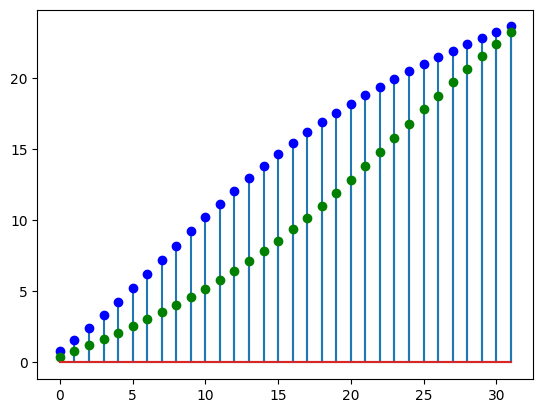

In [4]:
plt.stem(new_x_left, markerfmt='bo', label='left')
plt.stem(new_x_right, markerfmt='go', label='right')

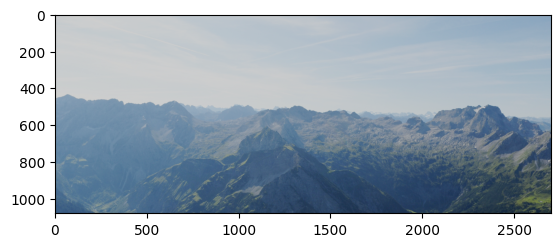

In [5]:
img_left = cv2.imread('images/Camera1.png')
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_left)

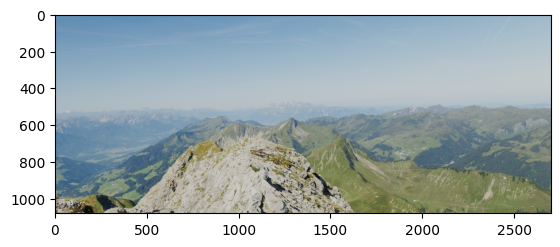

In [6]:
img_right = cv2.imread('images/Camera3.png')
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_right)

In [7]:
# (y, x, color depth)
img_left.shape

(1080, 2700, 3)

In [8]:
new_x_left = []
x_accum = 0
img_width = img_left.shape[1]
for i in range(0, img_width):
    x = W * i / img_width
    x_accum += fx(x)
    new_x_left.append(x_accum)

new_x_left = np.array(new_x_left)

new_x_left[-1]

1976.350155259691

In [9]:
new_x_right = []
x_accum = 0
img_width = img_left.shape[1]
for i in range(img_width, 0, -1):
    x = W * i / img_width
    x_accum += fx(x)
    new_x_right.append(x_accum)

new_x_right = np.array(new_x_right)

new_x_right[-1]

1975.9539018348682

In [10]:
ratio = img_left.shape[1] / new_x_left[-1]
new_x_left = new_x_left * ratio
new_x_left

array([1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
       2.69894845e+03, 2.69947433e+03, 2.70000000e+03])

In [11]:
ratio = img_right.shape[1] / new_x_right[-1]
new_x_right = new_x_right * ratio
new_x_right

array([5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
       2.69786415e+03, 2.69893238e+03, 2.70000000e+03])

In [12]:
len(new_x_left), len(new_x_right)

(2700, 2700)

In [13]:
map_x_left = np.zeros(img_left.shape[:2])
map_x_right = np.zeros(img_right.shape[:2])
map_y = np.zeros(img_left.shape[:2])
map_x_left.shape, map_x_right.shape

((1080, 2700), (1080, 2700))

In [14]:
for y in range(img_left.shape[0]):
    for x in range(img_left.shape[1]):
        map_x_left[y, x] = new_x_left[x]

map_x_left

array([[1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03],
       [1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03],
       [1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03],
       ...,
       [1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03],
       [1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03],
       [1.06678757e+00, 2.13419198e+00, 3.20221336e+00, ...,
        2.69894845e+03, 2.69947433e+03, 2.70000000e+03]])

In [15]:
for y in range(img_right.shape[0]):
    for x in range(img_right.shape[1]):
        map_x_right[y, x] = new_x_right[x]

map_x_right

array([[5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03],
       [5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03],
       [5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03],
       ...,
       [5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03],
       [5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03],
       [5.25549476e-01, 1.05132018e+00, 1.57731227e+00, ...,
        2.69786415e+03, 2.69893238e+03, 2.70000000e+03]])

In [16]:
for y in range(img_left.shape[0]):
    for x in range(img_left.shape[1]):
        map_y[y, x] = y
map_y

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       ...,
       [1.077e+03, 1.077e+03, 1.077e+03, ..., 1.077e+03, 1.077e+03,
        1.077e+03],
       [1.078e+03, 1.078e+03, 1.078e+03, ..., 1.078e+03, 1.078e+03,
        1.078e+03],
       [1.079e+03, 1.079e+03, 1.079e+03, ..., 1.079e+03, 1.079e+03,
        1.079e+03]])

True

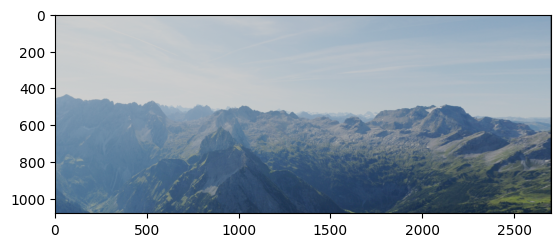

In [17]:
mapped_img_left = cv2.remap(img_left, map_x_left.astype(np.float32), map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(mapped_img_left)
mapped_img_left = cv2.cvtColor(mapped_img_left, cv2.COLOR_BGR2RGB)
cv2.imwrite('mapped_img_right.png', mapped_img_left)

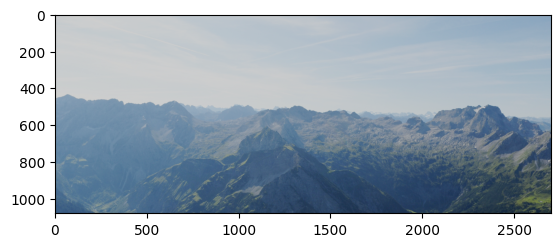

In [18]:
plt.imshow(img_left)

True

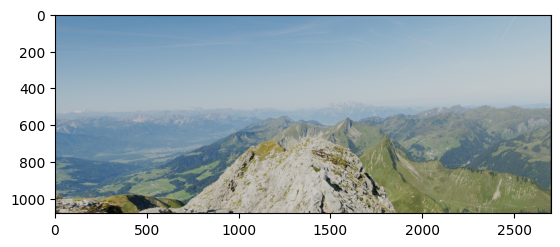

In [19]:
mapped_img_right = cv2.remap(img_right, map_x_right.astype(np.float32), map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(mapped_img_right)
mapped_img_right = cv2.cvtColor(mapped_img_right, cv2.COLOR_BGR2RGB)
cv2.imwrite('mapped_img_right.png', mapped_img_right)

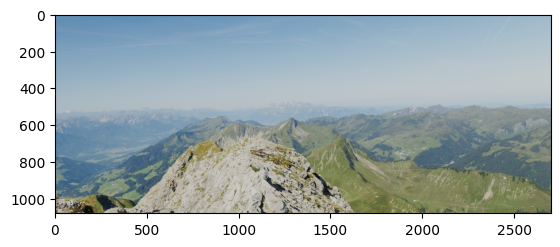

In [20]:
plt.imshow(img_right)